In [1]:
import pandas as pd
import numpy as np
import glob
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

root_dir = '/oak/stanford/groups/horence/rob/isoform_localizations/'

sys.path.append(os.path.join(root_dir,'scripts'))
import spatial_utils
import plot_utils

In [2]:
def parse_fpath(fpath):
    date,metric,sample,zslice = os.path.basename(f_path).replace('.csv','').split('_')
    df = pd.read_csv(fpath)
    df['run_date'] = date
    df['sample'] = sample
    df['zslice'] = zslice
    return df

f_paths = glob.glob('../sbatch_scripts/20210114_centrality_batched_outs/*.csv')

data = {
    'num_cells':[],
    'num_spots':[],
    'num_genes':[],
}
for f_path in f_paths:
    sub_df = parse_fpath(f_path)
    sub_df = sub_df[sub_df['num_cell_spots'].ge(50)]
    sub_df['gene_median_cell_zscore'] = sub_df.groupby('target_molecule_name')['cell_zscore'].transform('median')
    sub_df['gene_var_cell_zscore'] = sub_df.groupby('target_molecule_name')['cell_zscore'].transform('std')**2

    data['num_cells'].append(sub_df['cell_id'].unique().size)
    data['num_spots'].append(sub_df.shape[0])
    data['num_genes'].append(sub_df['target_molecule_name'].unique().size)
    
summary_df = pd.DataFrame(data)
summary_df

,num_cells,num_spots,num_genes
0,765,28686,251
1,6080,231455,252
2,3715,151816,252
3,7625,326245,252
4,7007,273793,252
...,...,...,...
72,14092,581999,252
73,5564,214566,252
74,4461,174851,252
75,9193,395453,252


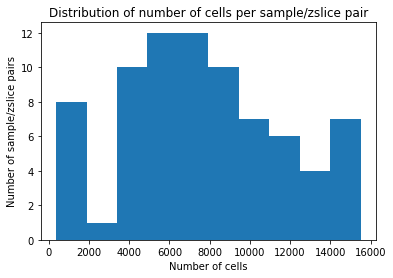

In [3]:
summary_df['num_cells'].plot.hist()
plt.title('Distribution of number of cells per sample/zslice pair')
plt.xlabel('Number of cells')
plt.ylabel('Number of sample/zslice pairs')
plt.show()
plt.close()

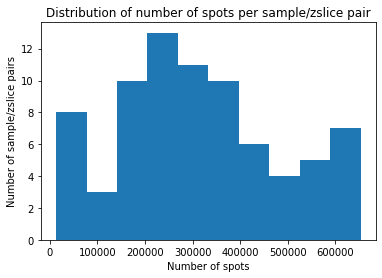

In [4]:
summary_df['num_spots'].plot.hist()
plt.title('Distribution of number of spots per sample/zslice pair')
plt.xlabel('Number of spots')
plt.ylabel('Number of sample/zslice pairs')
plt.show()
plt.close()

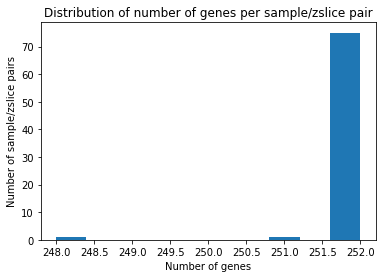

In [5]:
summary_df['num_genes'].plot.hist()
plt.title('Distribution of number of genes per sample/zslice pair')
plt.xlabel('Number of genes')
plt.ylabel('Number of sample/zslice pairs')
plt.show()
plt.close()

In [6]:
spots = pd.read_csv('../processed_data/all_passing_rna_spots.csv')
cells = pd.read_csv('../processed_data/segmented_cell_shapes.csv')

In [7]:
f_paths = glob.glob('../sbatch_scripts/20210114_centrality_batched_outs/*.csv')
f_path = f_paths[1]
df = parse_fpath(f_path)
df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
0,100023039956376282494130276516336349465,Ccdc3,12,1,centrality,1.761999,-0.489585,0.001717,0.652980,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
1,100023039956376282494130276516336349465,Cldn5,12,2,centrality,2.238683,-0.291478,0.000000,5.337648,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
2,100023039956376282494130276516336349465,Elfn1,12,1,centrality,3.877548,0.389623,0.026833,0.847336,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
3,100023039956376282494130276516336349465,Flt1,12,3,centrality,5.326962,0.991990,0.000000,1.726145,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
4,100023039956376282494130276516336349465,Pdgfra,12,1,centrality,6.047764,1.291551,0.000000,0.766588,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


In [8]:
df

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
0,100023039956376282494130276516336349465,Ccdc3,12,1,centrality,1.761999,-0.489585,0.001717,0.652980,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
1,100023039956376282494130276516336349465,Cldn5,12,2,centrality,2.238683,-0.291478,0.000000,5.337648,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
2,100023039956376282494130276516336349465,Elfn1,12,1,centrality,3.877548,0.389623,0.026833,0.847336,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
3,100023039956376282494130276516336349465,Flt1,12,3,centrality,5.326962,0.991990,0.000000,1.726145,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
4,100023039956376282494130276516336349465,Pdgfra,12,1,centrality,6.047764,1.291551,0.000000,0.766588,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364457,99975236811446463664882595554107570635,Igfbp5,6,2,centrality,4.888393,1.028485,0.084555,0.790003,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
364458,99975236811446463664882595554107570635,Ntng2,6,1,centrality,3.671001,0.000000,0.013059,0.703423,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
364459,99975236811446463664882595554107570635,Pou3f3,6,1,centrality,3.525961,-0.122534,0.000000,0.724079,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
364460,99975236811446463664882595554107570635,Ptpru,6,1,centrality,3.381994,-0.244161,-0.066157,0.937876,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


In [9]:
#There are extreme cell_zscores caused by cells with few spots
print(df['cell_zscore'].min())
print(df['cell_zscore'].max())

#filter out cells that have fewer than 50 RNA spots
#recalculate the per-gene summary stats
df = df[df['num_cell_spots'].ge(50)]
df['gene_median_cell_zscore'] = df.groupby('target_molecule_name')['cell_zscore'].transform('median')
df['gene_var_cell_zscore'] = df.groupby('target_molecule_name')['cell_zscore'].transform('std')**2

print(df['cell_zscore'].min())
print(df['cell_zscore'].max())

-767.6270993643083
767.6270993643083
-5.32993564296117
3.819652297245388


In [10]:
df.shape

(231455, 13)

In [11]:
df['cell_id'].unique().size

6080

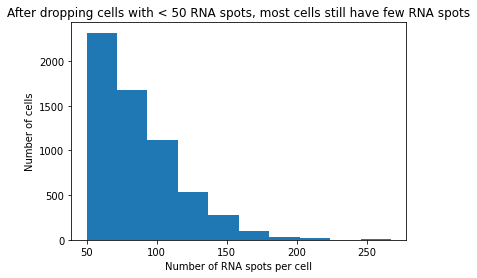

In [12]:
df.drop_duplicates('cell_id')['num_cell_spots'].plot.hist()
plt.title('After dropping cells with < 50 RNA spots, most cells still have few RNA spots')
plt.xlabel('Number of RNA spots per cell')
plt.ylabel('Number of cells')
plt.show()
plt.close()

In [13]:
df['target_molecule_name'].unique().size

252

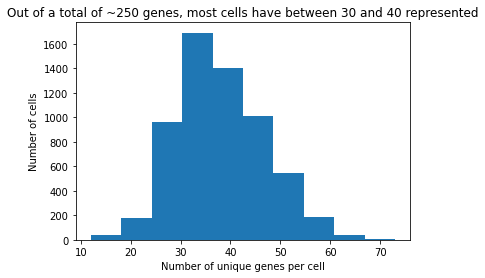

In [14]:
df.groupby('cell_id')['target_molecule_name'].unique().apply(len).plot.hist()
plt.title('Out of a total of ~250 genes, most cells have between 30 and 40 represented')
plt.xlabel('Number of unique genes per cell')
plt.ylabel('Number of cells')
plt.show()
plt.close()

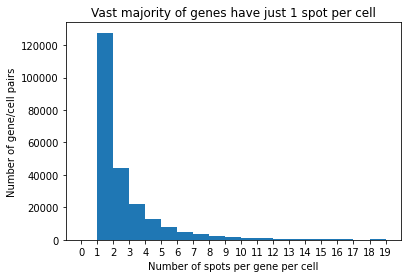

In [15]:
bins = np.arange(0,20)
df['num_gene_spots'].plot.hist(bins=bins)
plt.title('Vast majority of genes have just 1 spot per cell')
plt.xlabel('Number of spots per gene per cell')
plt.ylabel('Number of gene/cell pairs')
plt.xticks(bins)
plt.show()
plt.close()

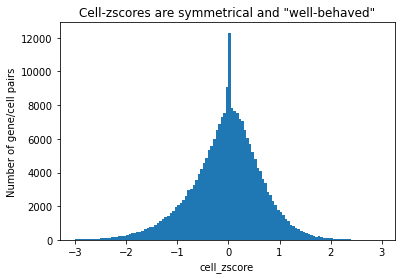

In [16]:
df['cell_zscore'].plot.hist(bins=np.arange(-3,3,0.05))
plt.title('Cell-zscores are symmetrical and "well-behaved"')
plt.xlabel('cell_zscore')
plt.ylabel('Number of gene/cell pairs')
plt.show()
plt.close()

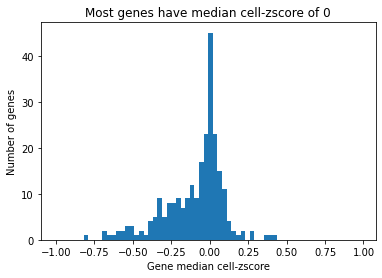

In [17]:
df.drop_duplicates('target_molecule_name')['gene_median_cell_zscore'].plot.hist(bins=np.arange(-1,1,0.03))
plt.title('Most genes have median cell-zscore of 0')
plt.xlabel('Gene median cell-zscore')
plt.ylabel('Number of genes')
plt.show()
plt.close()

In [18]:
(
    df.drop_duplicates('target_molecule_name')
    .sort_values(
        by=['gene_median_cell_zscore'],
        ascending=False
    )
    [['target_molecule_name','gene_median_cell_zscore']]
)

,target_molecule_name,gene_median_cell_zscore
49,Cxcl14,0.421546
384,Aqp4,0.400913
1383,Ctss,0.363443
2776,Gfap,0.278627
449,Daam2,0.274125
...,...,...
244,Col15a1,-0.623748
1496,Muc20,-0.661714
1578,Corin,-0.676363
14436,Blank-1,-0.681722


In [19]:
gs = ['Dnase1l3','C1qtnf7','Ndst4']
for g in gs:
    print(g,df[df['target_molecule_name'].eq(g)]['cell_id'].unique().size)

Dnase1l3 28
C1qtnf7 64
Ndst4 170


In [20]:
df[df['target_molecule_name'].eq('Dnase1l3')].sort_values('cell_zscore',ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
34855,130227315473240298562037127967933992570,Dnase1l3,117,1,centrality,8.532676,1.879577,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
217066,282536095766747765887189910544549883404,Dnase1l3,63,1,centrality,5.598423,1.456270,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
9595,108286112803152932923832701686083275189,Dnase1l3,147,1,centrality,8.682976,1.304961,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
250527,31195037403836698378256493566979621221,Dnase1l3,93,1,centrality,8.031923,0.990634,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
113300,195946552278002866509639027050778224068,Dnase1l3,111,1,centrality,6.811383,0.854372,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
331798,73234673095661826235209598313228597836,Dnase1l3,60,1,centrality,6.472624,0.785431,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
324986,67784534122194263062268826874092139014,Dnase1l3,131,1,centrality,7.210207,0.547461,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
11253,109753773954350640156799825515159419611,Dnase1l3,110,1,centrality,7.894745,0.450948,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
330880,72719821530980506390708048722291485210,Dnase1l3,100,1,centrality,6.354824,0.062049,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
245755,307379159966975957698001876075669748712,Dnase1l3,53,1,centrality,4.224443,-0.006047,-0.307188,1.15751,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


In [21]:
#gene product is transmembrane. therefore expecting high centrality potentially for RNA?
#don't really see that trend
df[df['target_molecule_name'].eq('Pld5')].sort_values('cell_zscore',ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
9300,108153476761787768888428215718047876327,Pld5,59,1,centrality,7.672293,1.916963,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
148686,225544501205292915195021777220066993953,Pld5,55,1,centrality,6.994048,1.849624,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
276131,333779838830328898065567465566472940777,Pld5,119,1,centrality,6.803568,1.795313,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
60186,150985164035219558705355685480394793130,Pld5,54,1,centrality,3.474459,1.759539,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
319291,62901391602836649883826403427300932588,Pld5,61,1,centrality,8.979700,1.678360,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29455,125943218102694337114658065259876869958,Pld5,72,1,centrality,0.593156,-1.940113,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
28932,125583910905565177938337043215437871354,Pld5,52,1,centrality,1.644305,-2.113158,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
165503,240095078236753985754394965716459070923,Pld5,106,1,centrality,1.965012,-2.219484,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
121577,203068825862347011777140417702281924463,Pld5,126,2,centrality,1.693370,-2.316952,-0.004956,0.480813,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


In [22]:
#gene product expected to be nuclear. therefore expecting low centrality potentially?
#don't really see that trend
df[df['target_molecule_name'].eq('Satb2')].sort_values('cell_zscore',ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
354280,91882422435173989887594469501234459327,Satb2,51,3,centrality,5.533503,3.176736,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
316434,60515877021485749126876239386478260060,Satb2,51,1,centrality,5.264417,2.909378,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
78237,166113530732029391905263205390245562885,Satb2,74,1,centrality,8.799007,2.184527,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
17263,115040753926891578492148402259857803889,Satb2,58,1,centrality,4.975127,2.128729,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
59156,149988507944034690288217767158228149368,Satb2,111,1,centrality,8.516436,2.074363,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288768,37856056487612456297809149823122230006,Satb2,52,1,centrality,2.543709,-2.400983,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
207515,274176394870601888169334035156972082609,Satb2,118,1,centrality,1.989650,-2.434376,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
212590,278900736197515524735397296275358553632,Satb2,69,2,centrality,2.933233,-2.466557,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
324276,67094797676770291767975864331386523746,Satb2,97,1,centrality,1.560400,-2.738516,0.054357,0.262251,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


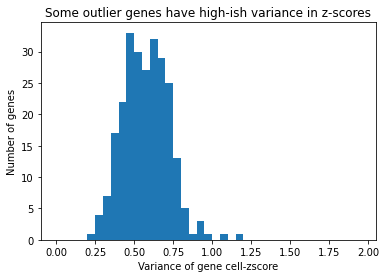

In [23]:
df.drop_duplicates('target_molecule_name')['gene_var_cell_zscore'].plot.hist(bins=np.arange(0,2,0.05))
plt.title('Some outlier genes have high-ish variance in z-scores')
plt.xlabel('Variance of gene cell-zscore')
plt.ylabel('Number of genes')
plt.show()
plt.close()

In [24]:
(
    df.drop_duplicates('target_molecule_name')
    .sort_values(
        by=['gene_var_cell_zscore'],
        ascending=False
    )
    [['target_molecule_name','gene_var_cell_zscore']]
)

,target_molecule_name,gene_var_cell_zscore
9595,Dnase1l3,1.157510
533,Vipr2,1.078227
1376,Blank-4,0.990239
316,Nxph2,0.938080
6145,Blank-2,0.926824
...,...,...
45,C1ql3,0.292769
325,Slc32a1,0.289735
224,Sulf2,0.273643
63,Satb2,0.262251


In [25]:
df[df['target_molecule_name'].eq('Col24a1')].sort_values('cell_zscore',ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
212994,279251918882298781607257433472844951425,Col24a1,60,1,centrality,5.432193,1.635912,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
9079,108052217763329823309785241261187940041,Col24a1,106,1,centrality,8.925964,1.452321,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
256296,316685244063241626537785633126896396538,Col24a1,69,1,centrality,5.545158,1.378194,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
35913,13102984304105018907453989813879684712,Col24a1,87,1,centrality,6.653910,1.184550,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
213674,27979550625295374046591200433604759806,Col24a1,78,1,centrality,6.405462,0.995329,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121695,203191658821865209196176133328312153765,Col24a1,61,1,centrality,1.518344,-2.702709,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
49752,141886863575017998248051573254793281901,Col24a1,79,1,centrality,2.780854,-2.750144,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
193035,262286074618531815583808964281075875674,Col24a1,94,2,centrality,1.420649,-3.038321,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
154312,230491368825727748761073037642499649809,Col24a1,91,1,centrality,1.752615,-3.863549,-0.81282,0.824969,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


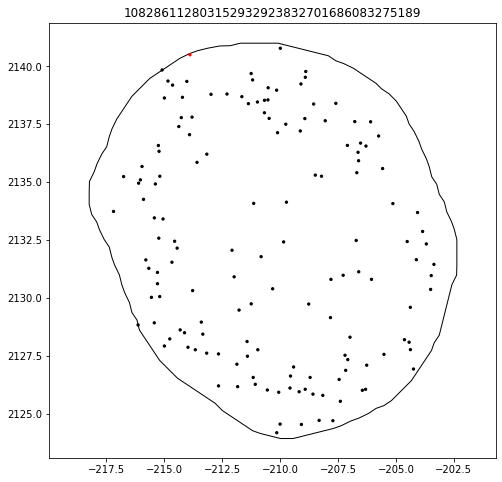

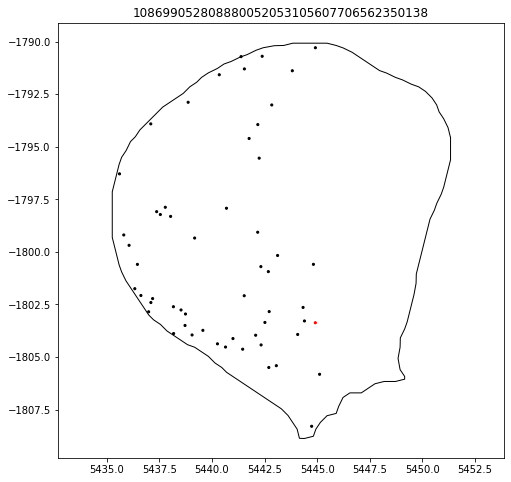

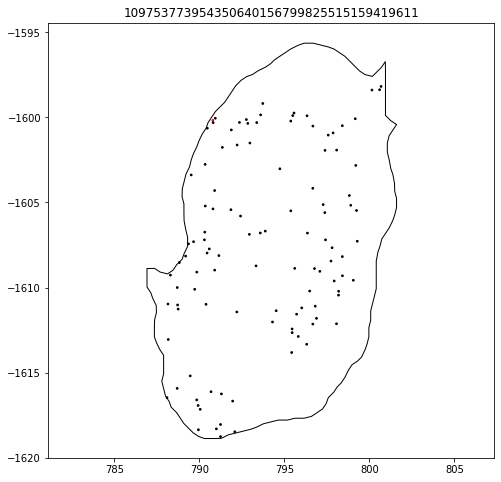

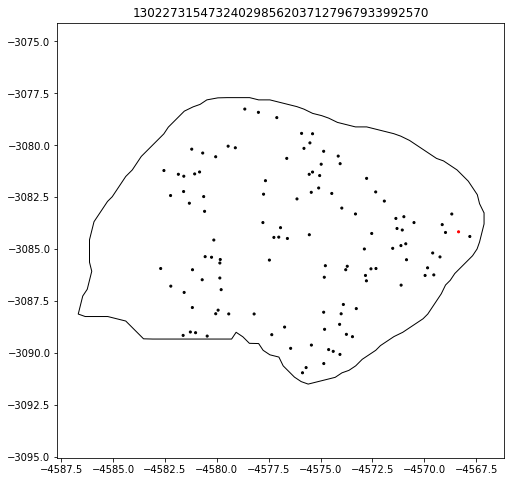

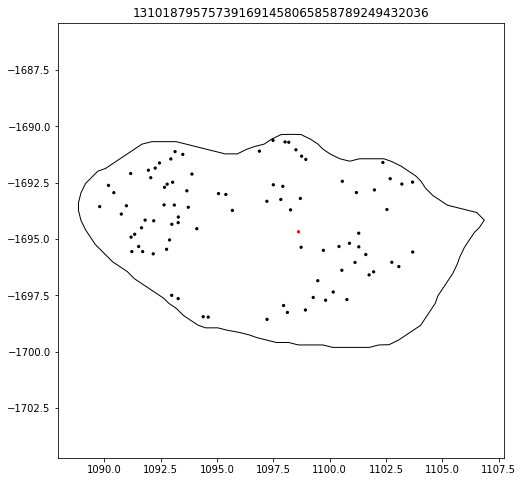

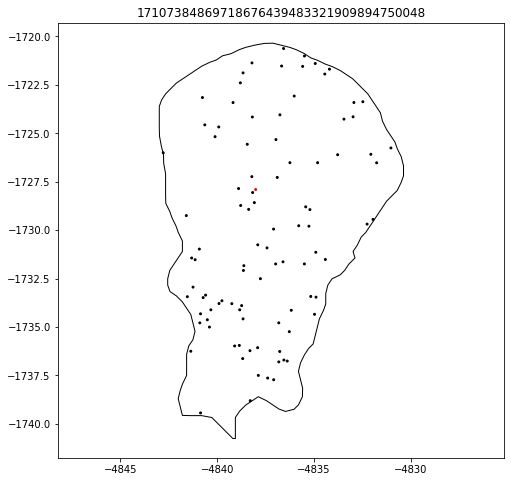

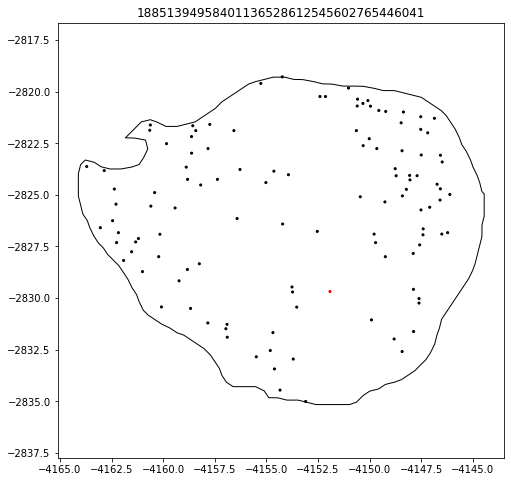

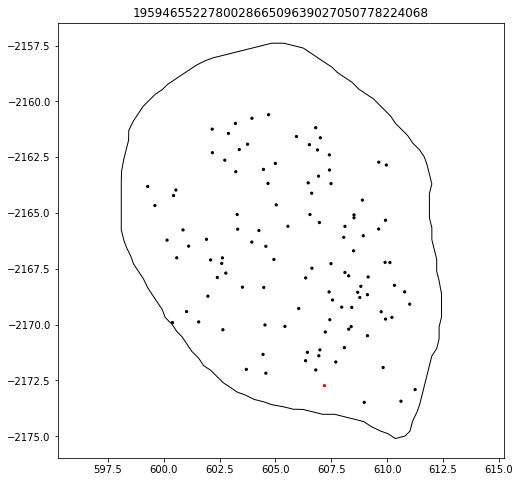

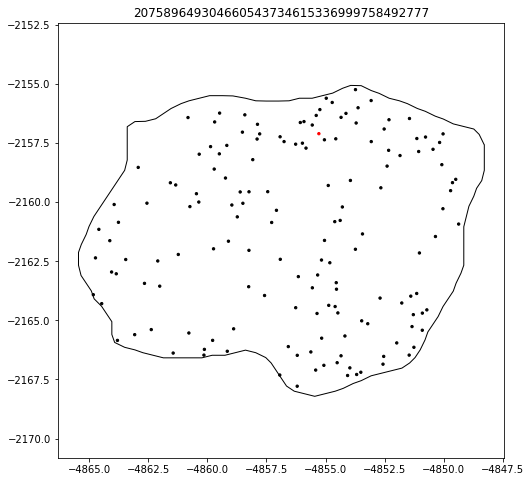

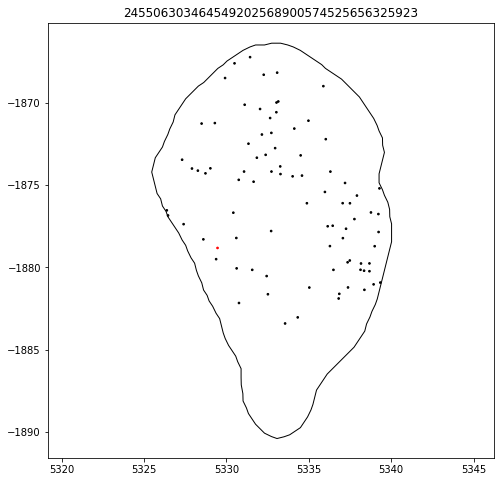

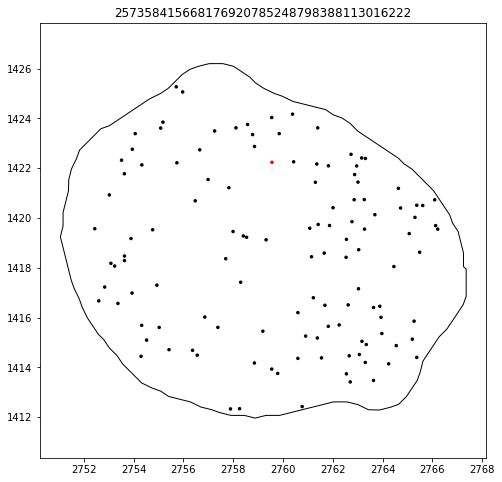

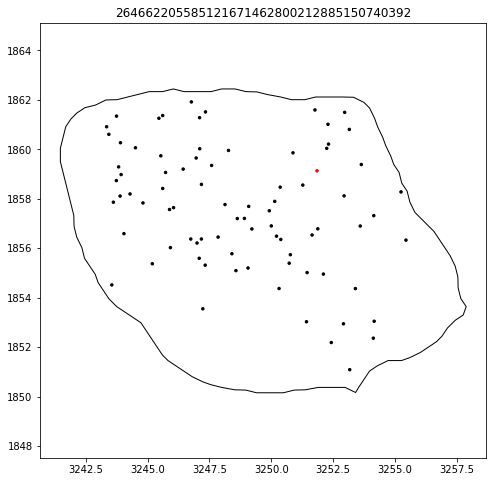

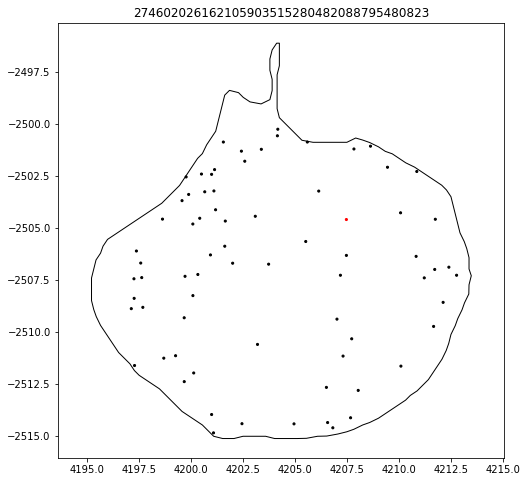

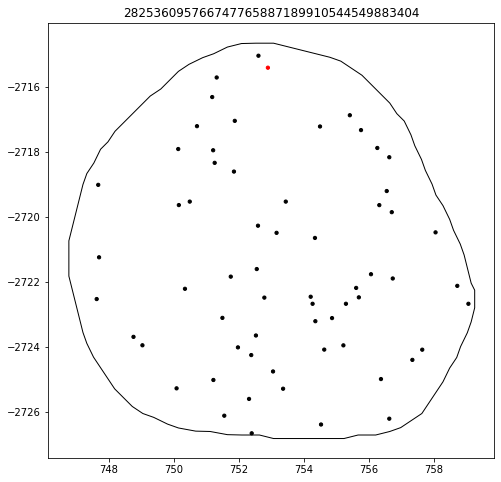

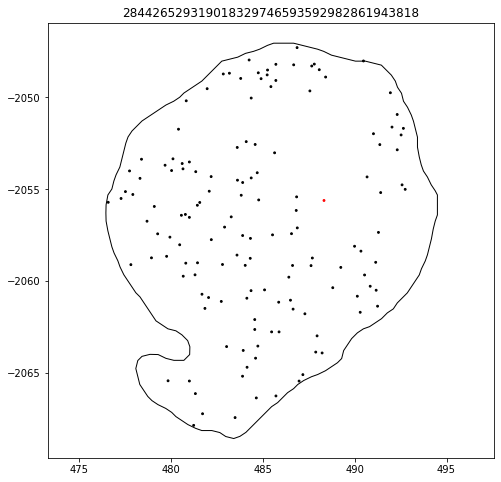

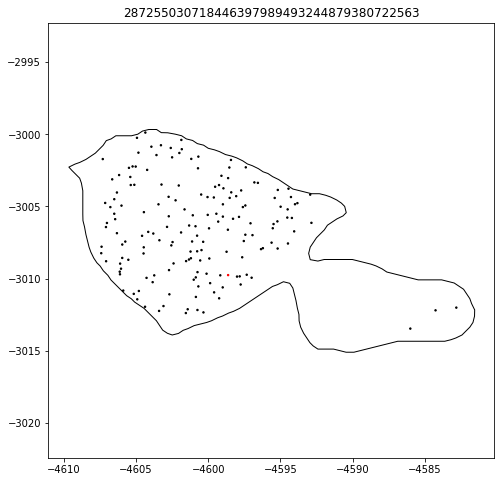

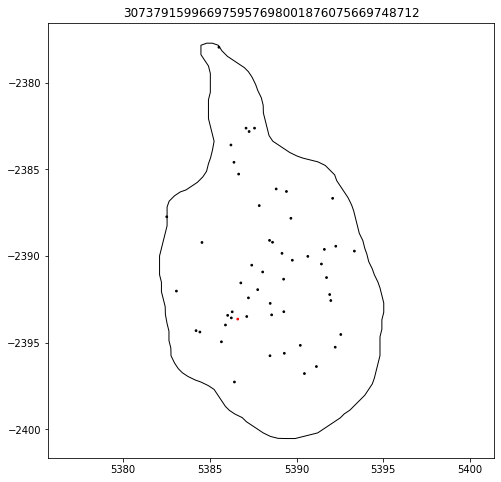

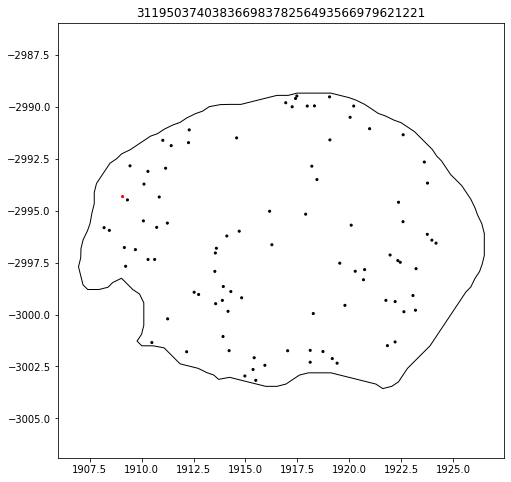

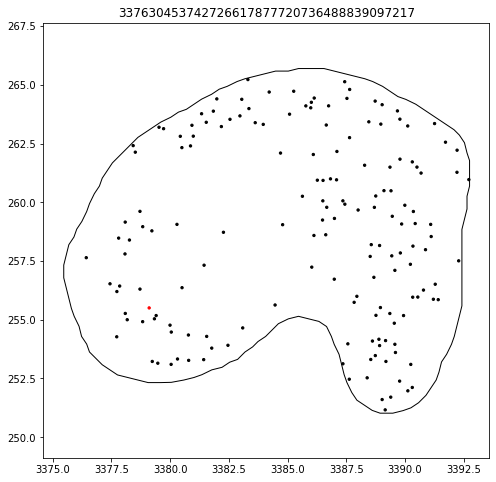

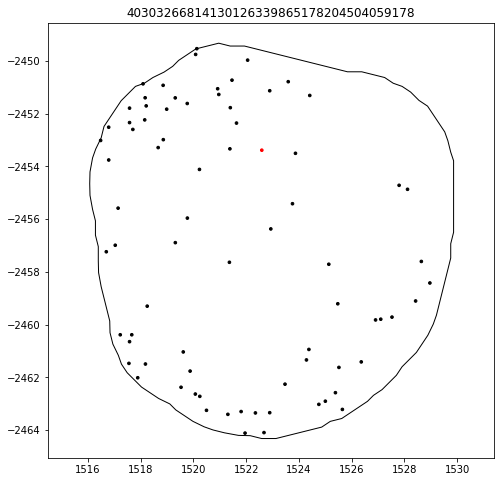

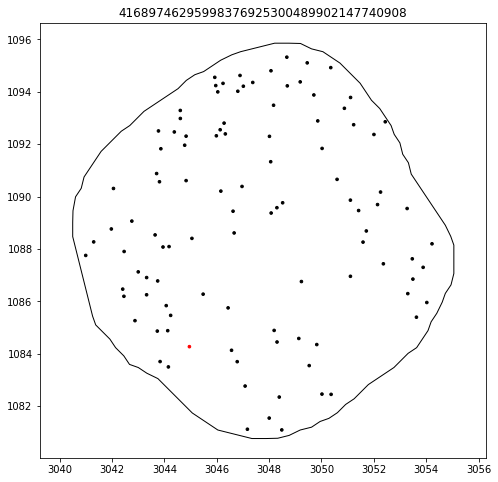

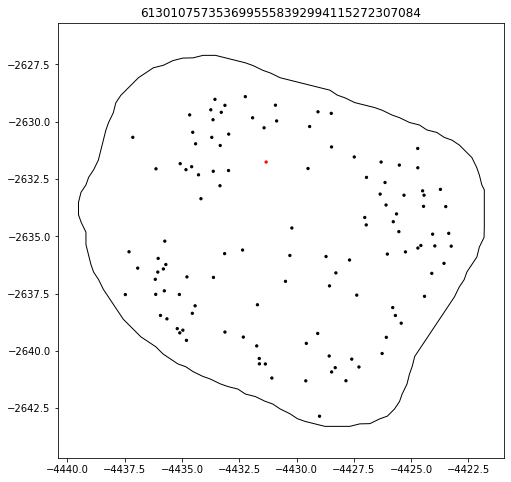

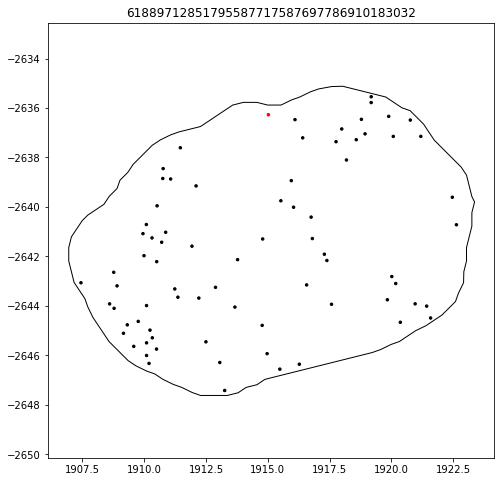

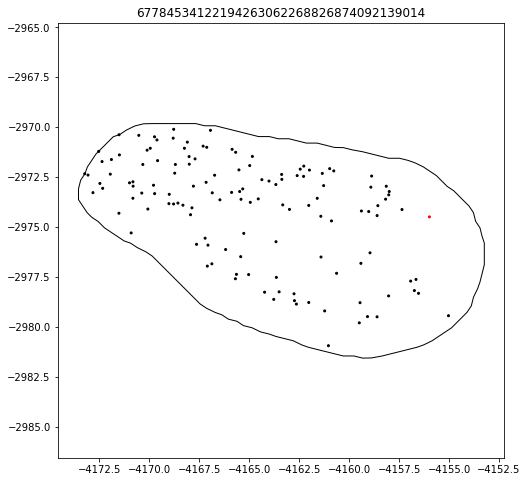

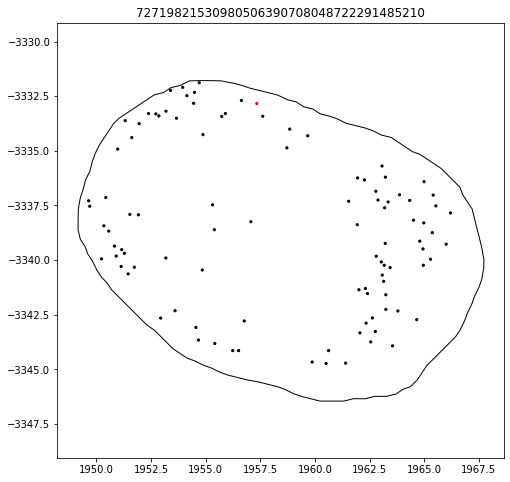

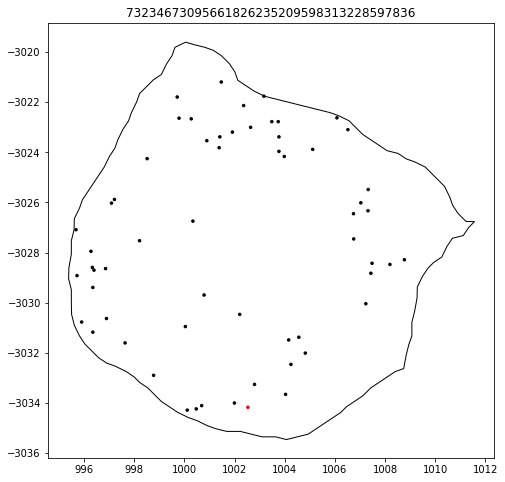

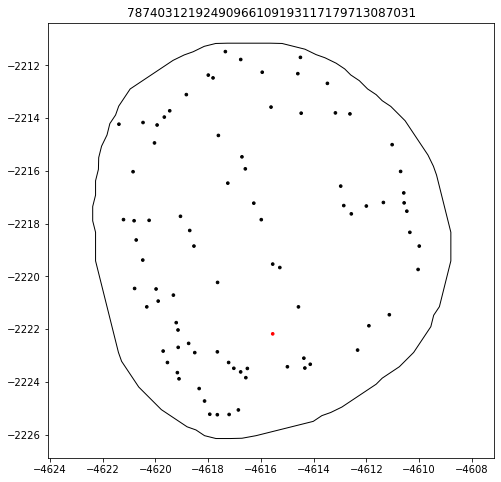

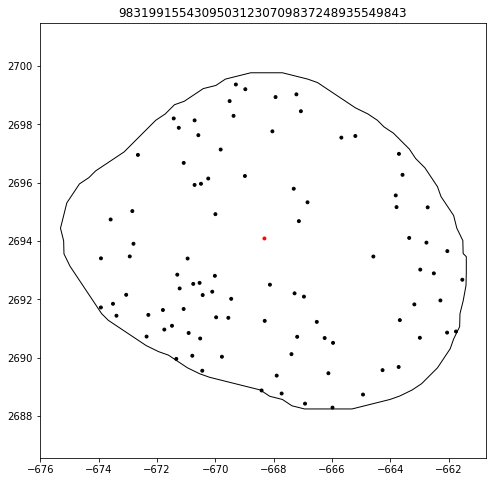

In [26]:
gene = 'Dnase1l3'
spot_colors = {gene: 'r'}

sub_cell_ids = df[df['target_molecule_name'].eq(gene)]['cell_id']
z_slice = df['zslice'].unique()[0]
sub_spots = spots[spots['cell_id'].isin(sub_cell_ids) & spots['global_z'].eq(float(z_slice))]
sub_cells = cells[cells['cell_id'].isin(sub_cell_ids)]

plot_utils.plot_spot_cells(sub_spots, sub_cells, spot_colors)

In [29]:
df[df['cell_zscore'] == df['cell_zscore'].max()]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
212990,279251918882298781607257433472844951425,Aqp4,60,1,centrality,7.030371,3.819652,0.400913,0.587033,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
212990,279251918882298781607257433472844951425,Aqp4,60,1,centrality,7.030371,3.819652,0.400913,0.587033,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
293595,41615712040566594782756282575857295650,Nos1,78,3,centrality,7.040488,3.614990,0.078202,0.416158,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
66589,155927036909405088785824765270680680589,Flt1,51,1,centrality,5.300703,3.479302,0.137496,0.521118,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
108039,191194014900155426418525011979048776093,Tenm3,54,1,centrality,6.753484,3.429566,0.053589,0.378681,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
341319,81425416121520244368723106551170412645,Ptprt,63,1,centrality,5.646253,3.355574,0.037196,0.309787,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


Aqp4


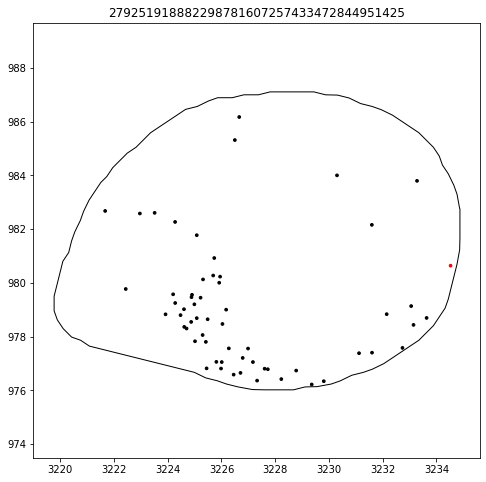

Nos1


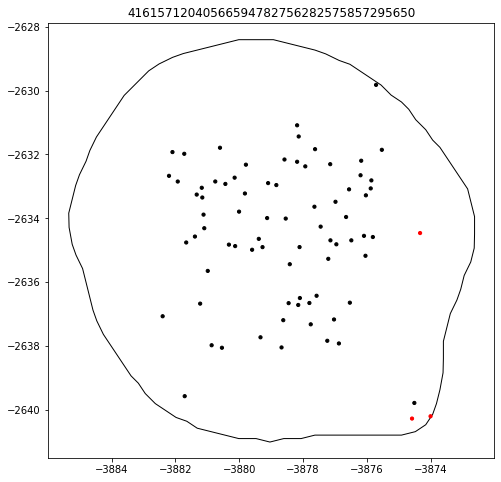

Flt1


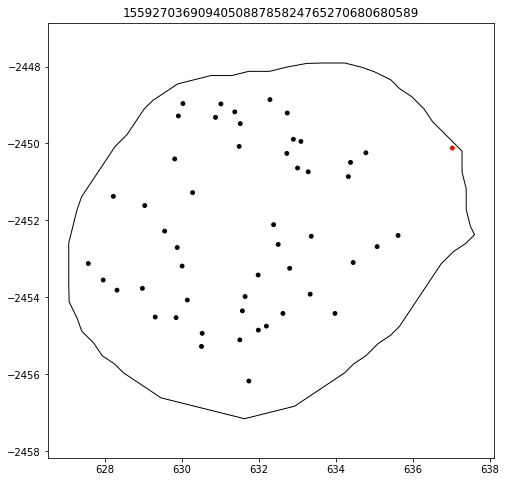

Tenm3


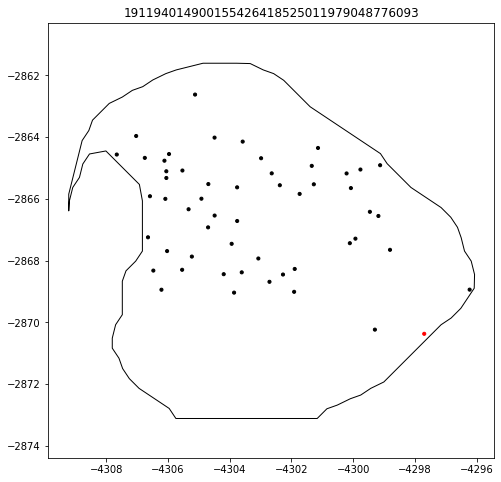

Ptprt


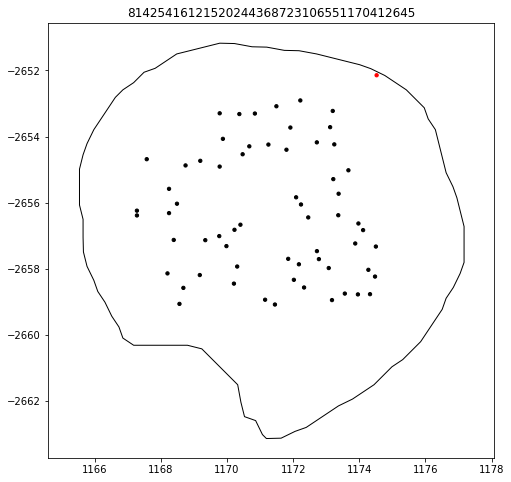

In [34]:
rows = df.sort_values('cell_zscore',ascending=False).head()

for i,r in rows.iterrows():

    gene = r['target_molecule_name']
    spot_colors = {gene: 'r'}
    print(gene)

    sub_cell_ids = [r['cell_id']]
    z_slice = float(r['zslice'])
    sub_spots = spots[spots['cell_id'].isin(sub_cell_ids) & spots['global_z'].eq(z_slice)]
    sub_cells = cells[cells['cell_id'].isin(sub_cell_ids)]

    plot_utils.plot_spot_cells(sub_spots, sub_cells, spot_colors)

In [35]:
df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
42,100078777556413476689405249469750752562,Bcl11b,53,1,centrality,4.755780,1.108368,0.037654,0.447458,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
43,100078777556413476689405249469750752562,Blank-5,53,1,centrality,3.661224,-0.900163,-0.463808,0.830231,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
44,100078777556413476689405249469750752562,Blnk,53,1,centrality,4.029929,-0.223584,-0.010724,0.542092,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
45,100078777556413476689405249469750752562,C1ql3,53,2,centrality,4.514197,0.665058,0.093936,0.292769,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
46,100078777556413476689405249469750752562,Cbln2,53,1,centrality,4.262142,0.202532,0.013366,0.406634,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


In [36]:
df.sort_values(['num_gene_spots'],ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version,run_date,sample,zslice
33596,129164176396427564542572644863815634623,Vtn,223,52,centrality,7.527160,-0.026718,0.000000,0.419611,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
107700,190938409160309270828889476813302242755,Trp53i11,250,50,centrality,7.612641,0.114834,0.048000,0.380390,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
238786,301570269357630400204775676106363670737,Nos1,150,49,centrality,6.692156,-0.073097,0.078202,0.416158,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
155039,231102933916470918363497444248955729873,Igf2,153,47,centrality,6.414843,0.232848,0.020974,0.375712,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
227517,291252615277790760263720159115048773665,Cxcl14,102,41,centrality,5.329979,0.030211,0.421546,0.559980,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88419,174438512273544351874334500073302815711,Acta2,51,1,centrality,3.917133,-0.305650,0.124889,0.462313,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
88420,174438512273544351874334500073302815711,Aqp4,51,1,centrality,5.661743,0.819417,0.400913,0.587033,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
216974,282459741112648571461498848022618184540,Prss12,88,1,centrality,5.561545,0.051377,0.049288,0.456316,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5
216973,282459741112648571461498848022618184540,Pdgfc,88,1,centrality,5.109677,-0.170366,-0.028270,0.522646,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...,20210114,mouse1sample1,7.5


Vtn


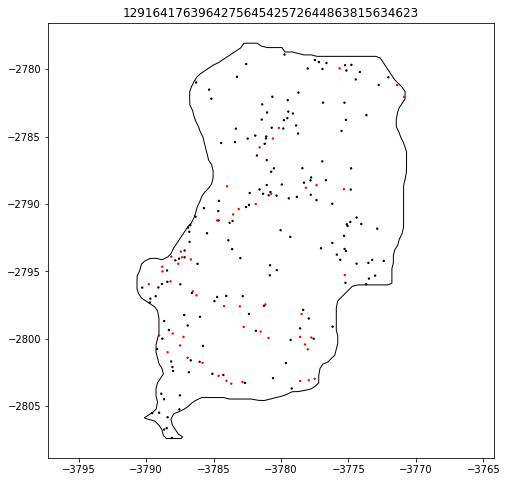

In [38]:
gene = 'Vtn'
spot_colors = {gene: 'r'}
print(gene)

sub_cell_ids = ['129164176396427564542572644863815634623']
z_slice = 7.5
sub_spots = spots[spots['cell_id'].isin(sub_cell_ids) & spots['global_z'].eq(z_slice)]
sub_cells = cells[cells['cell_id'].isin(sub_cell_ids)]

plot_utils.plot_spot_cells(sub_spots, sub_cells, spot_colors)